In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


<AxesSubplot:xlabel='region', ylabel='expenses'>

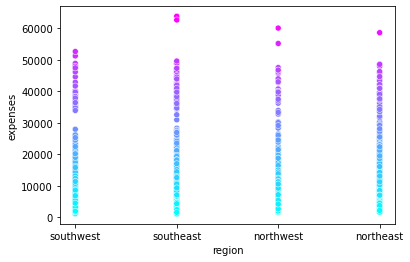

In [4]:
sns.scatterplot(data=df, x='region', y='expenses',hue='expenses',palette='cool', legend=False)

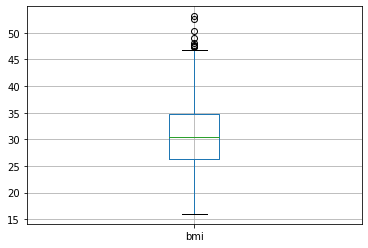

In [5]:
figure=df.boxplot(column='bmi')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

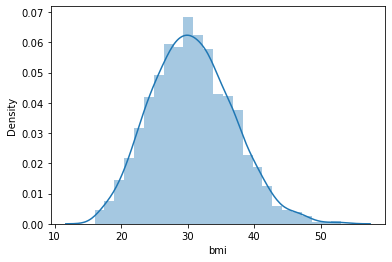

In [43]:
sns.distplot(df['bmi'])

<AxesSubplot:xlabel='age', ylabel='bmi'>

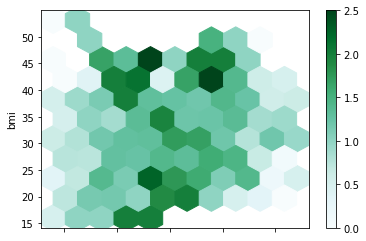

In [44]:
df.plot.hexbin(x = 'age' , y = 'bmi' , gridsize= 10 ,C ='children' )

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='bmi'>

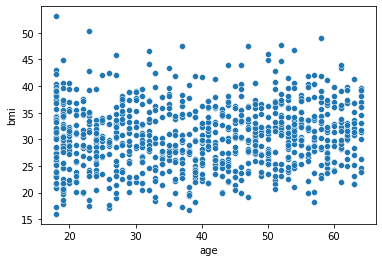

In [45]:
sns.scatterplot(X_train['age'],X_train['bmi'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
# Converting type of columns to category
df['sex']=df['sex'].astype('category')
df['smoker']=df['smoker'].astype('category')
#df['region']=df['region'].astype('category')



In [9]:
#Create an instance of One-hot-encoder
enc=OneHotEncoder()
 
#Passing encoded columns
'''
NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we
have huge  number of categorical variables
'''
enc_data=pd.DataFrame(enc.fit_transform(df[['sex','smoker','region']]).toarray())
 
#Merge with main
df=df.join(enc_data)
df.head()
df=df.drop('sex',axis=1)
df=df.drop('smoker',axis=1)
df=df.drop('region',axis=1)
df.head()

,age,bmi,children,expenses,0,1,2,3,4,5,6,7
0,19,27.9,0,16884.92,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.8,1,1725.55,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.0,3,4449.46,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.7,0,21984.47,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.9,0,3866.86,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [10]:
df.isnull().sum()

age         0
bmi         0
children    0
expenses    0
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
dtype: int64

In [11]:
X=df.drop('expenses',axis=1)
y=df['expenses']

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   0         1338 non-null   float64
 4   1         1338 non-null   float64
 5   2         1338 non-null   float64
 6   3         1338 non-null   float64
 7   4         1338 non-null   float64
 8   5         1338 non-null   float64
 9   6         1338 non-null   float64
 10  7         1338 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 115.1 KB


In [13]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 1046 to 1126
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       896 non-null    int64  
 1   bmi       896 non-null    float64
 2   children  896 non-null    int64  
 3   0         896 non-null    float64
 4   1         896 non-null    float64
 5   2         896 non-null    float64
 6   3         896 non-null    float64
 7   4         896 non-null    float64
 8   5         896 non-null    float64
 9   6         896 non-null    float64
 10  7         896 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 84.0 KB


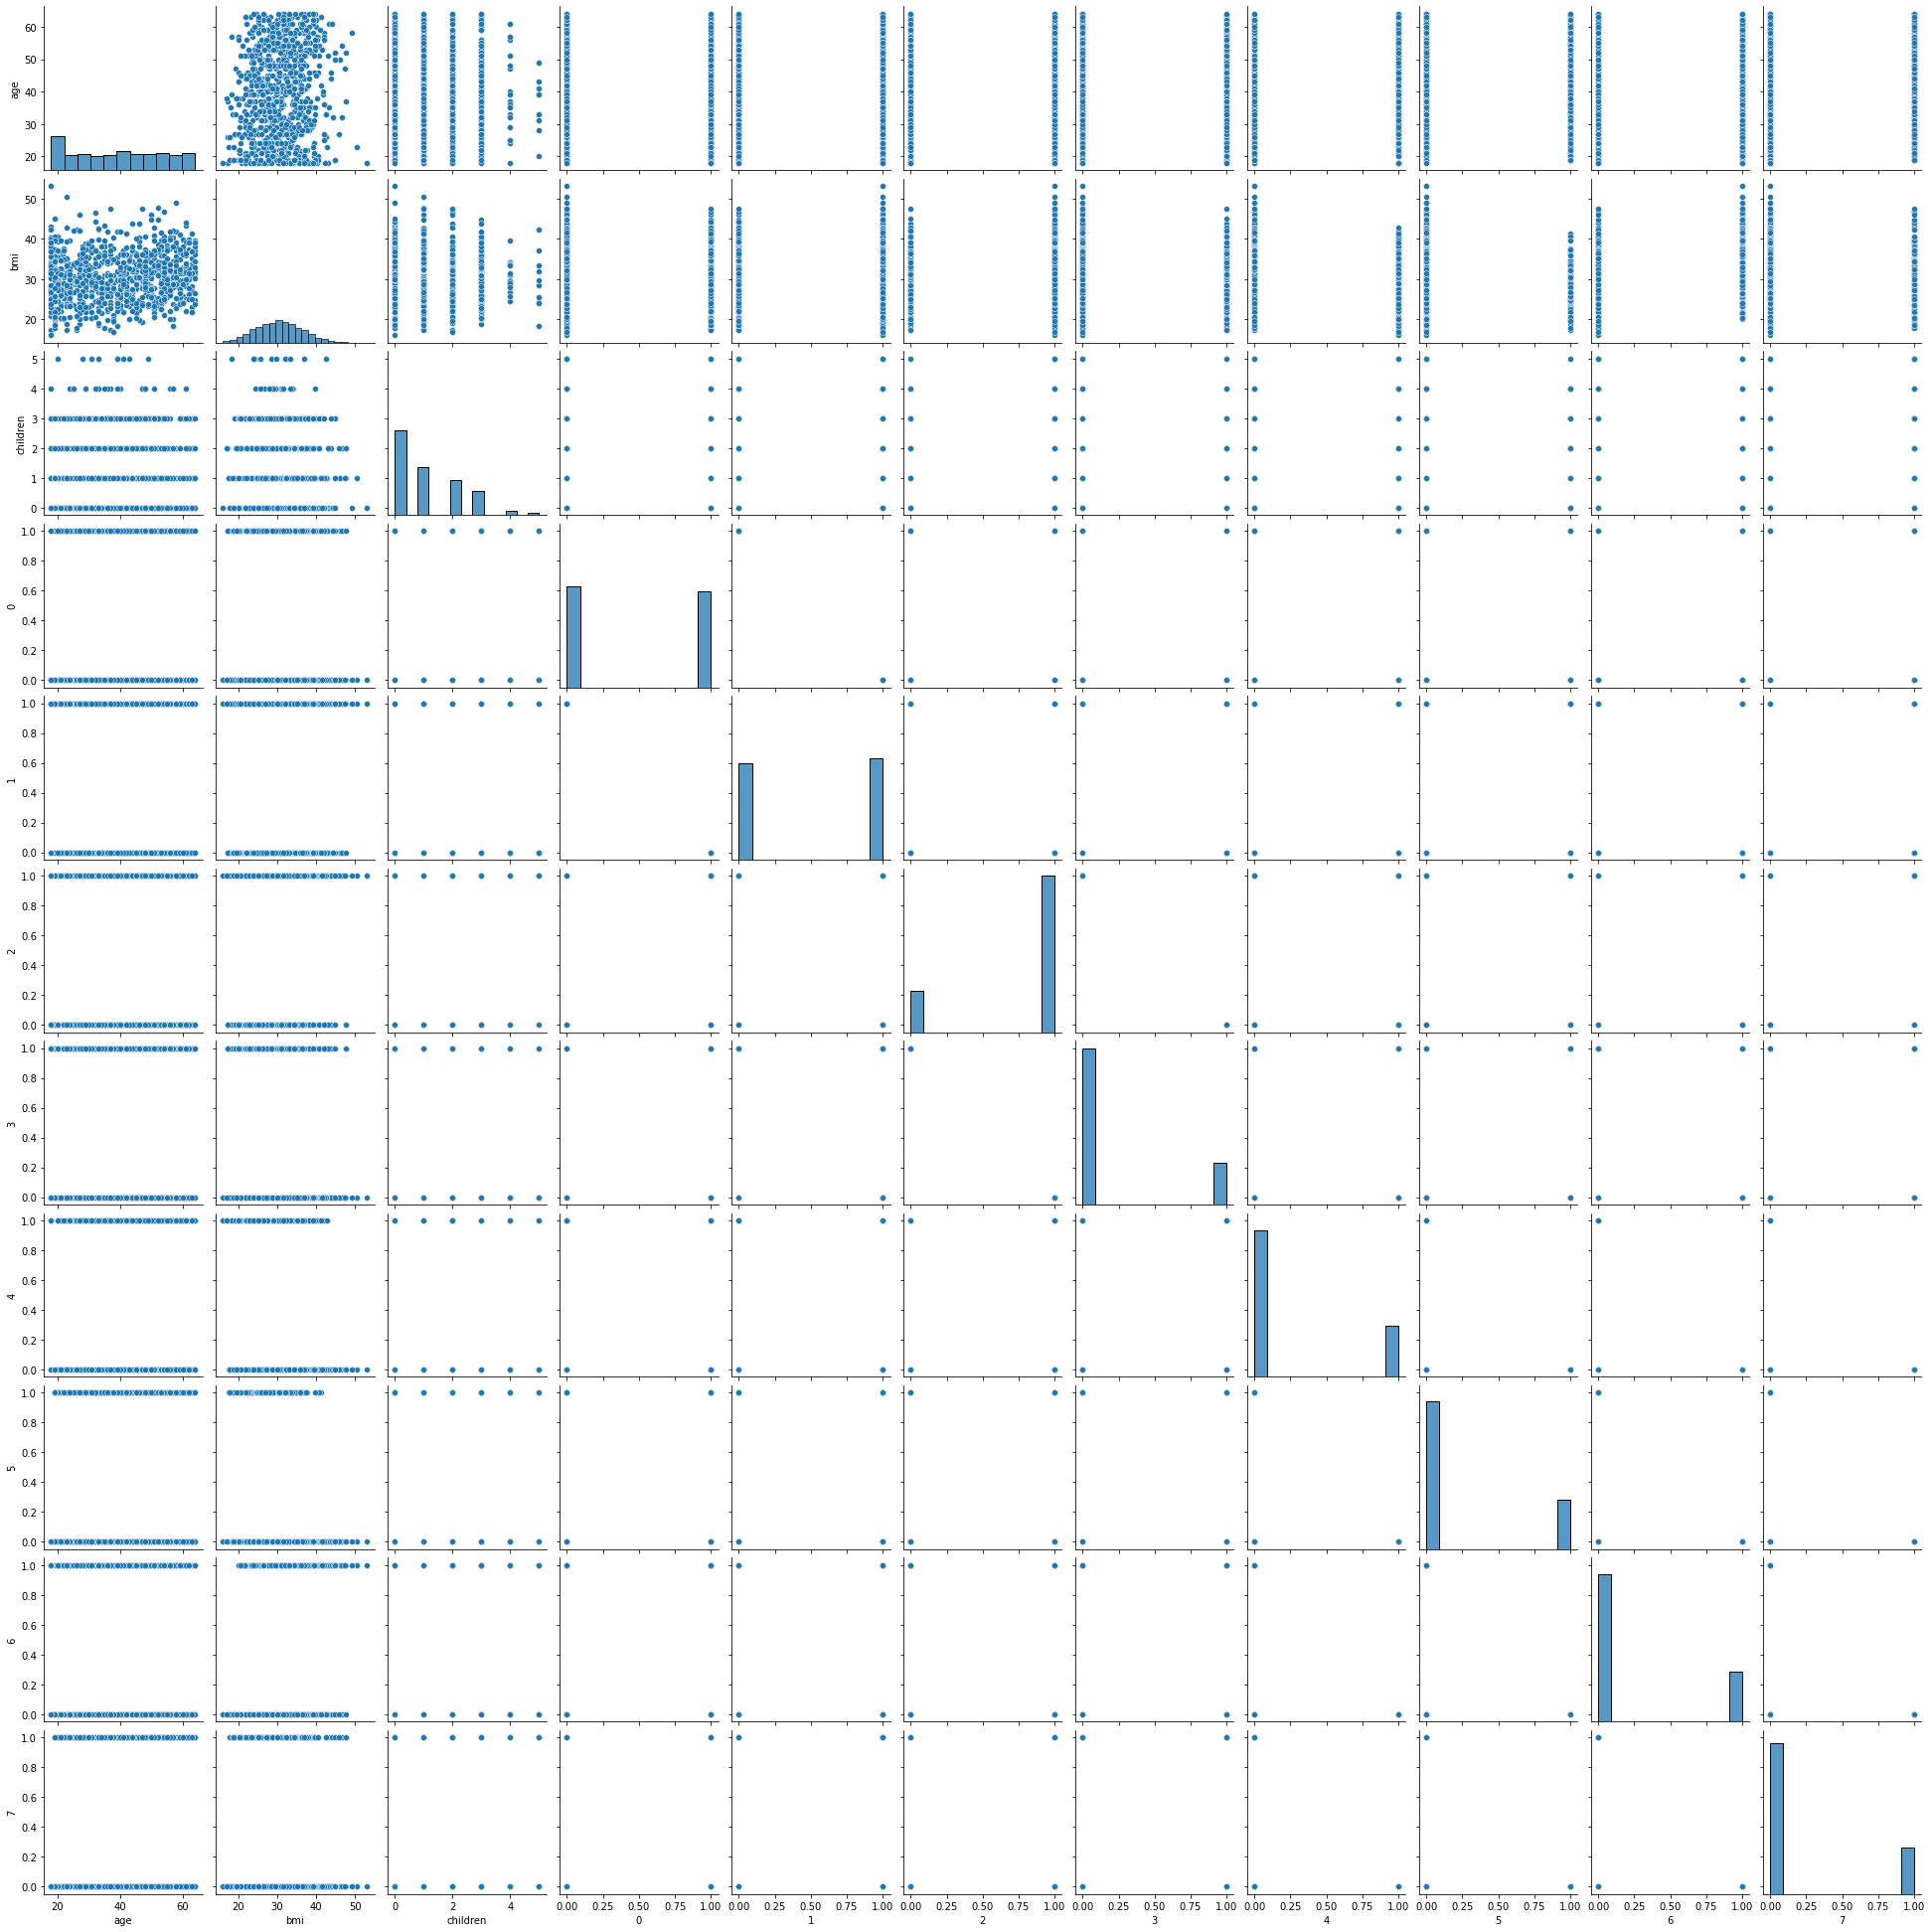

In [16]:
import seaborn as sns
sns.pairplot(X_train)

In [19]:
import matplotlib.pyplot as plt
X_train.corr()

,age,bmi,children,0,1,2,3,4,5,6,7
age,1.000000,0.108566,0.068628,0.007165,-0.007165,0.050570,-0.050570,-0.004660,0.012127,-0.023179,0.016212
bmi,0.108566,1.000000,-0.000897,-0.007319,0.007319,0.013672,-0.013672,-0.159947,-0.128787,0.247449,0.042101
children,0.068628,-0.000897,1.000000,-0.022998,0.022998,-0.032597,0.032597,0.000327,0.035310,-0.024951,-0.010828
0,0.007165,-0.007319,-0.022998,1.000000,-1.000000,0.036696,-0.036696,-0.006013,-0.042289,0.037427,0.011000
1,-0.007165,0.007319,0.022998,-1.000000,1.000000,-0.036696,0.036696,0.006013,0.042289,-0.037427,-0.011000
2,0.050570,0.013672,-0.032597,0.036696,-0.036696,1.000000,-1.000000,-0.017200,0.034205,-0.024827,0.008219
3,-0.050570,-0.013672,0.032597,-0.036696,0.036696,-1.000000,1.000000,0.017200,-0.034205,0.024827,-0.008219
4,-0.004660,-0.159947,0.000327,-0.006013,0.006013,-0.017200,0.017200,1.000000,-0.341306,-0.344335,-0.326154
5,0.012127,-0.128787,0.035310,-0.042289,0.042289,0.034205,-0.034205,-0.341306,1.000000,-0.340308,-0.322339
6,-0.023179,0.247449,-0.024951,0.037427,-0.037427,-0.024827,0.024827,-0.344335,-0.340308,1.000000,-0.325200


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children'>

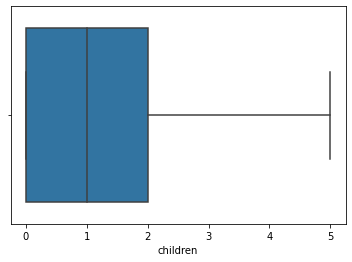

In [20]:
sns.boxplot(X_train['children'])

In [22]:
#len(df['sex'].unique())

In [23]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')


76.05676785381418 %


In [24]:
regressor.predict(X_test)

array([ 8.83328076e+03,  7.06276234e+03,  3.70103454e+04,  9.42274415e+03,
        2.70976467e+04,  1.10476544e+04,  1.26758805e+01,  1.72501073e+04,
        9.00375716e+02,  1.12488821e+04,  2.80232578e+04,  9.44409684e+03,
        4.91754674e+03,  3.83731985e+04,  4.03982501e+04,  3.70477099e+04,
        1.50683667e+04,  3.57559376e+04,  8.84318494e+03,  3.15177588e+04,
        3.58553970e+03,  1.01978397e+04,  2.41288969e+03,  7.14218593e+03,
        1.11808123e+04,  1.30469991e+04,  1.46468423e+04,  5.96359238e+03,
        9.84240953e+03,  1.96340598e+03,  8.89018262e+03,  1.31802385e+04,
        4.29310857e+03,  3.13777405e+03,  4.47686461e+03,  1.32792010e+04,
        1.79800157e+03,  8.76720306e+03,  3.32716510e+04,  3.25141682e+04,
        3.52656055e+03,  4.38036541e+03,  1.42156251e+04,  1.16375533e+04,
        8.60945353e+03,  1.22401697e+04,  5.13321977e+03,  2.85912482e+03,
        3.53667134e+04,  8.98896843e+03,  1.57643069e+04,  2.09237044e+03,
        1.24385809e+04,  

In [25]:
import math
from sklearn import metrics

predicted = regressor.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 0.8
     correlation coefficient = 0.9


In [26]:
X.head()

,age,bmi,children,0,1,2,3,4,5,6,7
0,19,27.9,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.8,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.0,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.7,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.9,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [27]:
dict_value={
    "age" : 18,
    "bmi"  : 33.8 ,
    "children" : 1,          
    "0" :1 ,
    "1": 0 ,
    "2" :0 ,
    "3" :1 ,
    "4" :0 ,
    "5" :1 ,
    "6" :0 ,
    "7" :0 
}

In [28]:
dict_value

{'age': 18,
 'bmi': 33.8,
 'children': 1,
 '0': 1,
 '1': 0,
 '2': 0,
 '3': 1,
 '4': 0,
 '5': 1,
 '6': 0,
 '7': 0}

In [29]:
dict_value.values()

dict_values([18, 33.8, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [30]:
list(dict_value.values())

[18, 33.8, 1, 1, 0, 0, 1, 0, 1, 0, 0]

In [31]:
[list(dict_value.values())]

[[18, 33.8, 1, 1, 0, 0, 1, 0, 1, 0, 0]]

In [32]:
regressor.predict([list(dict_value.values())])[0]

27746.35278472

In [33]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')

76.05676785381418 %


In [35]:
ridge_regressor.predict([list(dict_value.values())])[0]

27680.637665301372

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')
lasso_regressor.predict([list(dict_value.values())])[0]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13831659847.042448, tolerance: 10136916.397805726
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13405798101.665483, tolerance: 10209718.637070915
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12992448271.476114, tolerance: 11122669.215046879
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

76.05676785381418 %


27092.016819324803

In [37]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elasticnet=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
elastic_regressor=GridSearchCV(elasticnet,parameters,scoring='neg_mean_squared_error',cv=5)

elastic_regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')
elastic_regressor.predict([list(dict_value.values())])[0]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13836122536.521294, tolerance: 10136916.397805726
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13408512015.578743, tolerance: 10209718.637070915
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12994798704.016905, tolerance: 11122669.215046879
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

76.05676785381418 %


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16170049493.03823, tolerance: 13126910.03152053
  model = cd_fast.enet_coordinate_descent(


27716.91926476838

In [38]:

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
dregressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
dregressor.fit(X_train,y_train)
r2_score = dregressor.score(X_test,y_test)
print(r2_score*100,'%')

74.00560362613037 %


In [39]:
dregressor.predict([list(dict_value.values())])[0]

36898.73

In [40]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE
  
# Setting SEED for reproducibility
SEED = 1

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = SEED)
  
# Fit to training set
gbr.fit(X_train,y_train)
  
r2_score = gbr.score(X_test,y_test)
print(r2_score*100,'%')

75.63257468889742 %


In [41]:
pred_y = gbr.predict([list(dict_value.values())])[0]
pred_y

29030.294917736792

In [42]:
# Predict on test set
pred_yx = gbr.predict(X_test)
pred_yx

array([ 8.56020194e+03,  7.24725999e+03,  3.58863250e+04,  8.27207799e+03,
        2.76030452e+04,  1.00415907e+04,  2.79736585e+01,  1.73334396e+04,
        5.19825347e+02,  8.93171079e+03,  2.73775504e+04,  8.93899585e+03,
        4.87846675e+03,  3.65452720e+04,  4.05715169e+04,  3.54679117e+04,
        1.39812133e+04,  3.60096735e+04,  8.11517594e+03,  2.90923948e+04,
        4.82048223e+03,  1.07622884e+04,  4.37935373e+03,  7.36473687e+03,
        9.70928076e+03,  1.41394035e+04,  1.73334396e+04,  7.30151682e+03,
        8.56020194e+03,  4.21757831e+03,  6.71966740e+03,  1.31547406e+04,
        6.46530093e+03,  2.39220640e+03,  7.14461478e+03,  1.14829560e+04,
        2.68698102e+03,  7.64269933e+03,  3.27760702e+04,  3.28865858e+04,
        3.20941348e+03,  7.14461478e+03,  1.55703749e+04,  1.26626335e+04,
        9.81979632e+03,  1.35551197e+04,  6.68807996e+03,  4.15385889e+03,
        3.48125890e+04,  8.12600112e+03,  1.73334396e+04,  2.04216801e+03,
        1.03196278e+04,  